In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Import all library function


In [0]:
#Load the data
from google.colab import files # Use to load data on Google Colab
#uploaded = files.upload() # Use to load data on Google Colab
datasets = pd.read_csv('new_outputt.csv')

Here I load the dataset


In [0]:
X = datasets.iloc[:,[3,4]].values
Y = datasets.iloc[:,5].values

1.Colun 3= Number of bisulfite converted reads 
2.column 4= Number of Bisylfite un converted reads
3.Column 5= Beta value


In [0]:
#datasets.head()
print(X)

[[14. 10.]
 [ 3. 32.]
 [27. 55.]
 ...
 [18.  0.]
 [17.  0.]
 [nan nan]]


In [0]:

from sklearn.model_selection import train_test_split

In [0]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [0]:
# Fitting Simple Linear Regression to the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_Train, Y_Train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
print('Coefficients: \n', regressor.coef_)

Coefficients: 
 [-0.01645944  0.00600911]


In [0]:
# Predicting the Test set result ￼

Y_Pred = regressor.predict(X_Test)

ValueError: ignored

In [0]:
Y_Pred

NameError: ignored

In [0]:
Y_Test

array([1.      , 0.454545, 0.84375 , ..., 0.925926, 0.294118, 0.823529])

In [0]:
import sklearn.metrics as metrics
print(metrics.mean_squared_error(Y_Test, Y_Pred))

0.0243117957194675


In [0]:
X_Test

array([[ 0, 42],
       [18, 15],
       [ 5, 27],
       ...,
       [ 2, 25],
       [24, 10],
       [ 3, 14]])

In [0]:
Y_Test.shape

(256505,)

In [0]:
Y_Train.shape

(598510,)

Text(0, 0.5, 'Predicted Y')

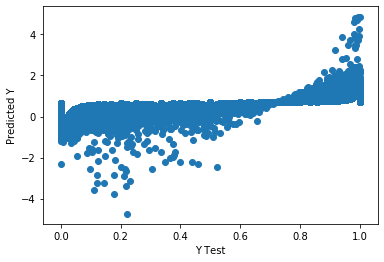

In [0]:

# Create a scatterplot of the real test values versus the predicted values.
plt.scatter(Y_Test,Y_Pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [0]:
# Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(Y_Test, Y_Pred))
print('MSE:', metrics.mean_squared_error(Y_Test, Y_Pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_Test, Y_Pred)))

MAE: 0.09897775546548623
MSE: 0.0243117957194675
RMSE: 0.15592240287869957


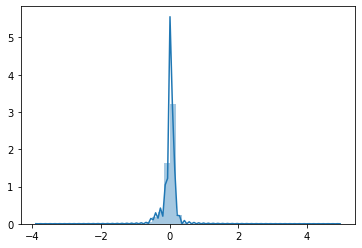

In [0]:
# Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().
import seaborn as sns
sns.distplot((Y_Test-Y_Pred),bins=50);

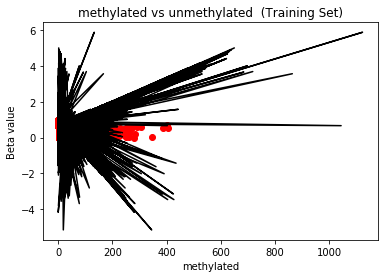

In [0]:
# Visualising the Training set results
plt.scatter(X_Train[:,0], Y_Train, color = 'red')
plt.plot(X_Train, regressor.predict(X_Train), color = 'black')
plt.title('methylated vs unmethylated  (Training Set)')
plt.xlabel('methylated')
plt.ylabel('Beta value')
plt.show()

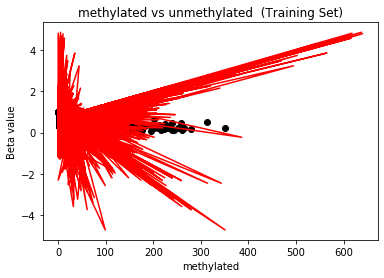

In [0]:
plt.scatter(X_Test[:,0], Y_Test, color = 'black')
plt.plot(X_Test, regressor.predict(X_Test), color = 'red')
plt.title('methylated vs unmethylated  (Training Set)')
plt.xlabel('methylated')
plt.ylabel('Beta value')
plt.show()

In [0]:
#Get the correlation of the columns
datasets.corr()

chromosome number  ...  fraction of reads have dna methylation
chromosome number                                     NaN  ...                                     NaN
start position                                        NaN  ...                               -0.036143
end position                                          NaN  ...                               -0.036143
number of bisulfite converted reads                   NaN  ...                               -0.749861
number of bisulfite un-converted reads                NaN  ...                                0.571538
fraction of reads have dna methylation                NaN  ...                                1.000000

[6 rows x 6 columns]

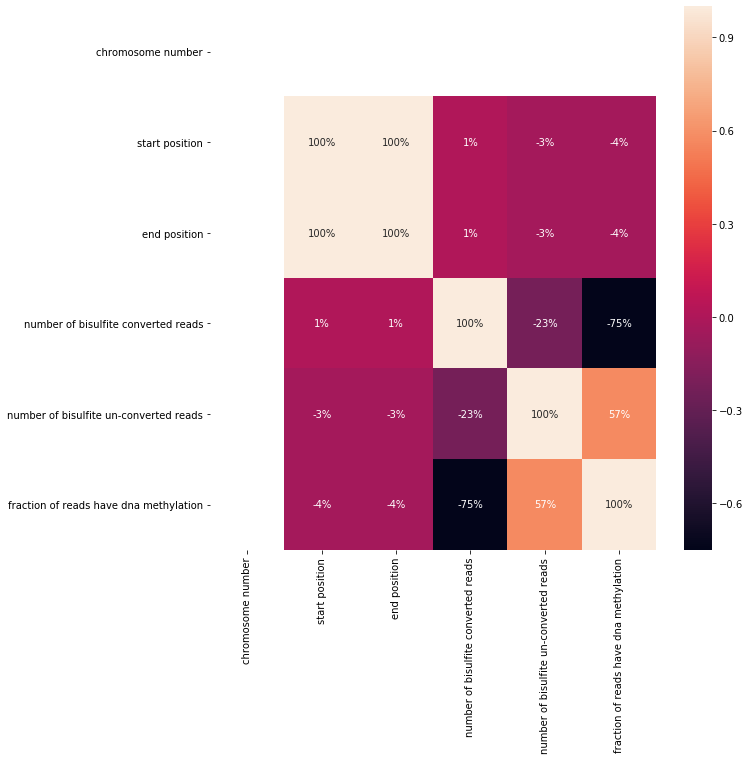

In [0]:
#Visualize the correlation by creating a heat map.
import seaborn as sns
plt.figure(figsize=(10,10))  
sns.heatmap(datasets.corr(), annot=True, fmt='.0%')

In [0]:
# print the R-squared value for the model
regressor.score(X_Train, Y_Train)

0.731573637753587

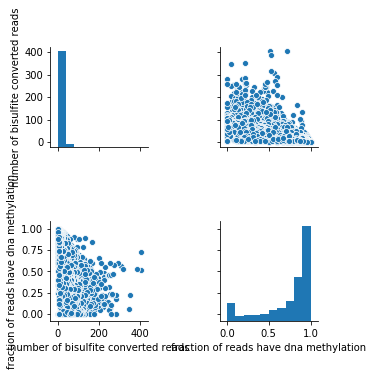

In [0]:
sns.pairplot(datasets.iloc[:,[3,5]])

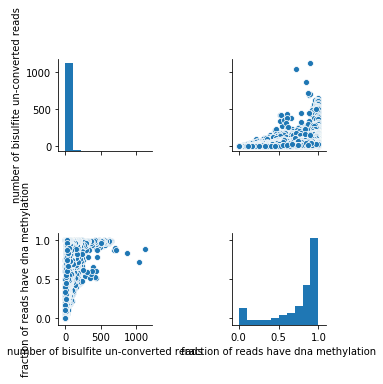

In [0]:
sns.pairplot(datasets.iloc[:,[4,5]])